# Our data

We'll use the data from the post from which this tutorial was derived. It contains sales information for a number of companies.

In [1]:
import numpy as np
import matplotlib.pyplot as plt


data = {
    'Barton LLC': 109438.50,
    'Frami, Hills and Schmidt': 103569.59,
    'Fritsch, Russel and Anderson': 112214.71,
    'Jerde-Hilpert': 112591.43,
    'Keeling LLC': 100934.30,
    'Koepp Ltd': 103660.54,
    'Kulas Inc': 137351.96,
    'Trantow-Barrows': 123381.38,
    'White-Trantow': 135841.99,
    'Will LLC': 104437.60
}

group_data = list(data.values())
group_names = list(data.keys())
group_mean = np.mean(group_data)

## Getting started

This data is naturally visualized as a barplot, with one bar per group. To do this with the object-oriented approach, we first generate an instance of **figure.Figure** and **axes.Axes**. The Figure is like a canvas, and the Axes is a part of that canvas on which we will make a particular visualization.

<BarContainer object of 10 artists>

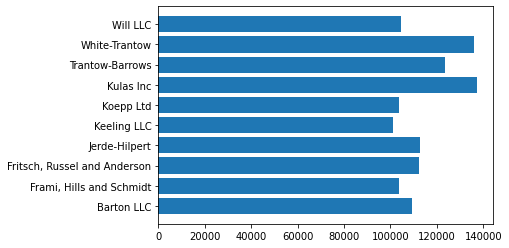

In [2]:
fig, ax = plt.subplots()
ax.barh(group_names, group_data)

## Controlling the style

There are many styles available in Matplotlib in order to let you tailor your visualization to your needs. To see a list of styles, we can use **style**.

In [3]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


Now let's remake the above plot by activating **fivethirtyeight** style to see how it looks

<BarContainer object of 10 artists>

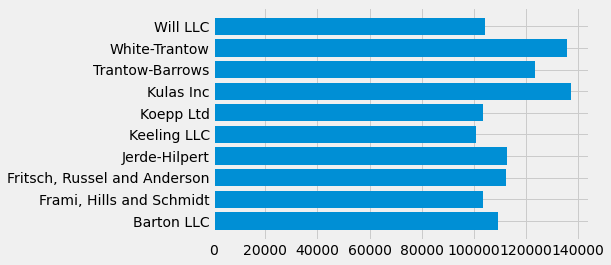

In [4]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()
ax.barh(group_names, group_data)

## Customxing the plot

Now we've got a plot with the general look that we want, so let's fine-tune it so that it's ready for print. First let's rotate the labels on the x-axis so that they show up more clearly. We can gain access to these labels with the **axes.Axes.get_xticklabels()** method

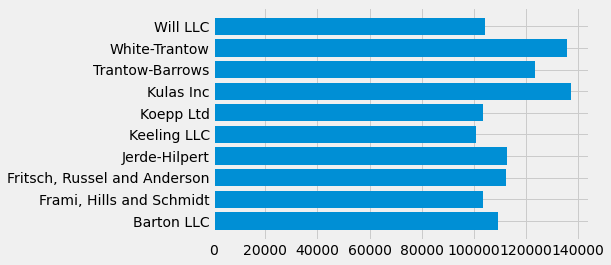

In [5]:
fig, ax = plt.subplots()
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()

If we'd like to set the property of many items at once, it's useful to use the **pyplot.setp()** function. This will take a list (or many lists) of Matplotlib objects, and attempt to set some style element of each one.

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

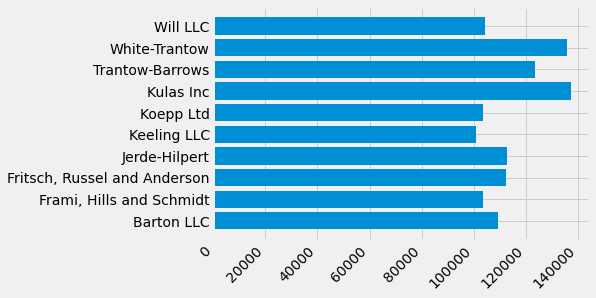

In [6]:
fig, ax = plt.subplots()
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')

It looks like this cut off some of the labels on the bottom. We can tell Matplotlib to automatically make room for elements in the figures that we create. To do this we set the `autolayout` value of our rcParams. For more information on controlling the style, layout, and other features of plots with rcParams.

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

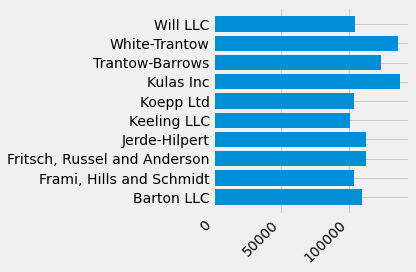

In [7]:
plt.rcParams.update({'figure.autolayout': True})

fig, ax = plt.subplots()
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')

Next, we add labels to the plot. To do this with the OO interface, we can use the `Artist.set()` method to set properties of this Axes objec

[(-10000.0, 140000.0),
 Text(0.5, 0, 'Total Revenue'),
 Text(0, 0.5, 'Company'),
 Text(0.5, 1.0, 'Company Revenue')]

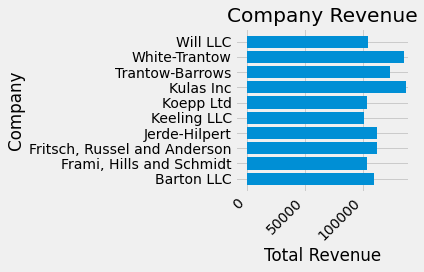

In [8]:
fig, ax = plt.subplots()
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.set(
    xlim = [-10000, 140000],
    xlabel = 'Total Revenue',
    ylabel = 'Company',
    title = 'Company Revenue'
)

We can also adjust the size of this plot using the pyplot.`subplots()` function. We can do this with the *figsize* keyword argument.

[(-10000.0, 140000.0),
 Text(0.5, 0, 'Total Revenue'),
 Text(0, 0.5, 'Company'),
 Text(0.5, 1.0, 'Company Revenue')]

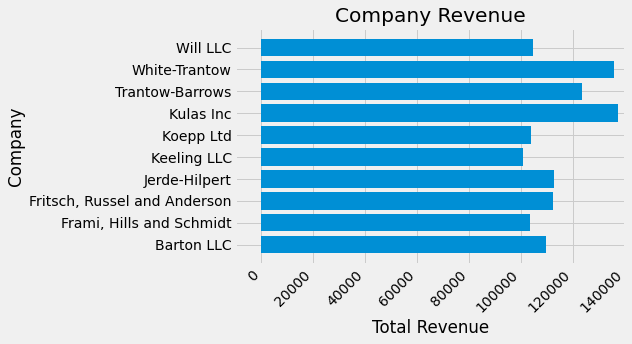

In [9]:
fig, ax = plt.subplots(figsize=(9, 5))
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.set(
    xlim = [-10000, 140000],
    xlabel = 'Total Revenue',
    ylabel = 'Company',
    title = 'Company Revenue'
)

For labels, we can specify custom formatting guidelines in the form of functions. Below we define a function that takes an integer as input, and returns a string as an output. When used with **Axis.set_major_formatter** or **Axis.set_minor_formatter**, they will automatically create and use a **ticker.FuncFormatter** class.

For this function, the `x` argument is the original tick label and `pos` is the tick position. We will only use `x` here but both arguments are needed.

We can then apply this function to the labels on our plot. To do this, we use the `xaxis` attribute of our axes. This lets you perform actions on a specific axis on our plot.

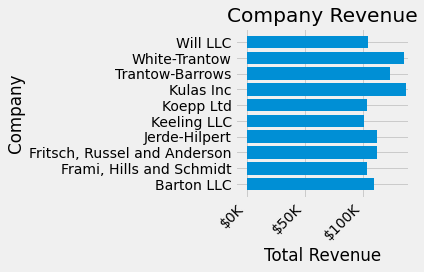

In [10]:
def currency(x, pos):
    """The two args are the value and tick position"""
    if x >= 1e6:
        s = '${:1.1f}M'.format(x*1e-6)
    else:
        s = '${:1.0f}K'.format(x*1e-3)
    return s

fig, ax = plt.subplots()
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.set(
    xlim = [-10000, 140000],
    xlabel = 'Total Revenue',
    ylabel = 'Company',
    title = 'Company Revenue'
)
ax.xaxis.set_major_formatter(currency)

## Combining multiple visualizations

It is possible to draw multiple plot elements on the same instance of **axes.Axes**. To do this we simply need to call another one of the plot methods on that axes object.

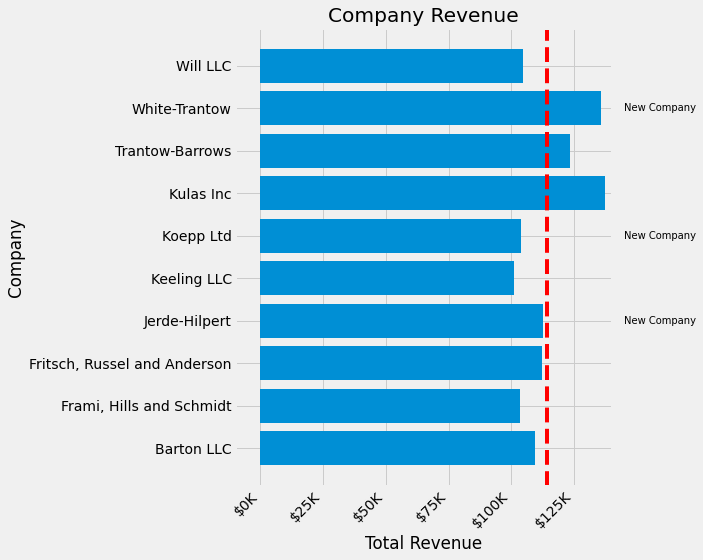

In [11]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')

ax.axvline(group_mean, ls='--', color='r')

for group in [3, 5, 8]:
    ax.text(145000, group, 'New Company', fontsize=10, verticalalignment='center')

ax.title.set(y=1.05)
ax.set(
    xlim = [-10000, 140000],
    xlabel = 'Total Revenue',
    ylabel = 'Company',
    title = 'Company Revenue'
)
ax.xaxis.set_major_formatter(currency)
ax.set_xticks([0, 25e3, 50e3, 75e3, 100e3, 125e3])
fig.subplots_adjust(right=.1)

plt.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2e91f521-cb0c-4321-9d67-70e26237efa4' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>